<a href="https://colab.research.google.com/github/M-luthra07/RNN/blob/main/practical_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('/content/Alcohol_Sales-1.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [26]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [27]:
df.columns = ['Sales']

<Axes: xlabel='DATE'>

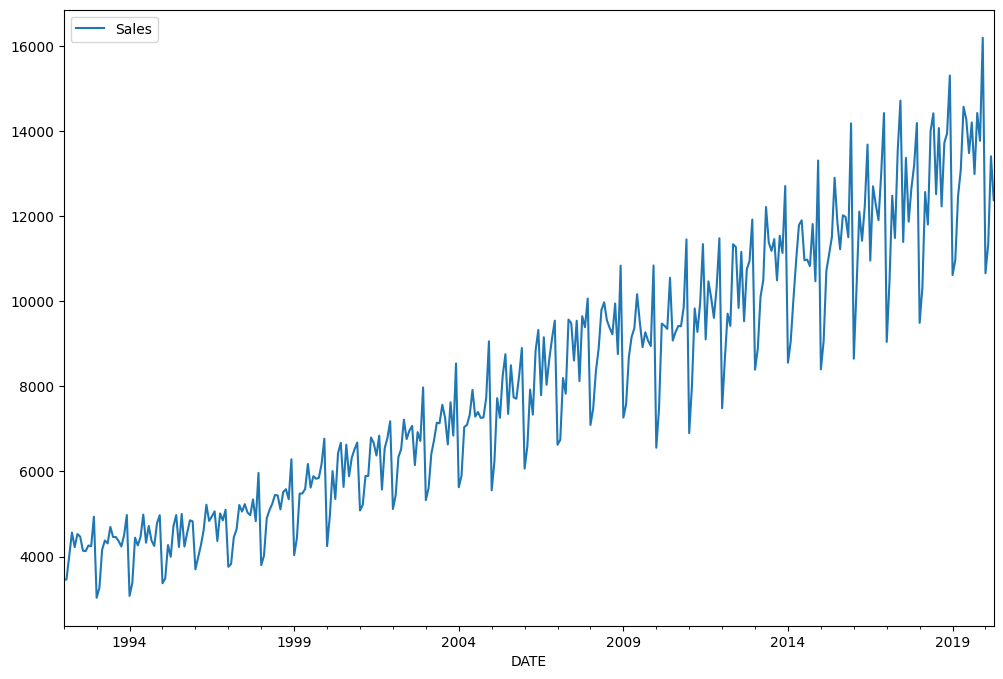

In [28]:
df.plot(figsize=(12,8))

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Axes: xlabel='DATE'>

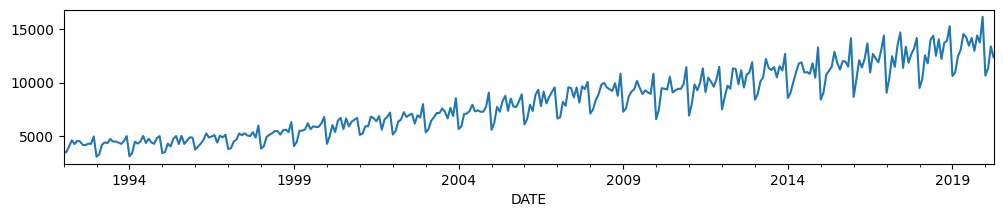

In [30]:
results = seasonal_decompose(df['Sales'])
results.observed.plot(figsize=(12,2))

<Axes: xlabel='DATE'>

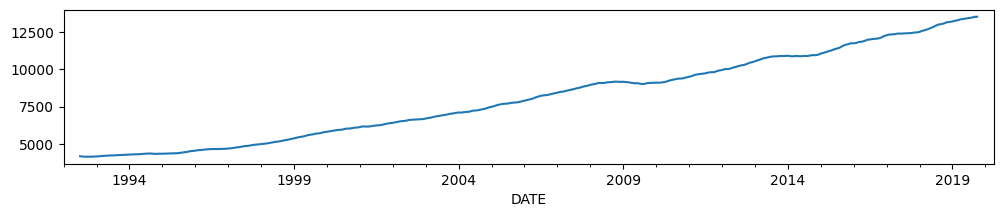

In [31]:
results.trend.plot(figsize=(12,2))

<Axes: xlabel='DATE'>

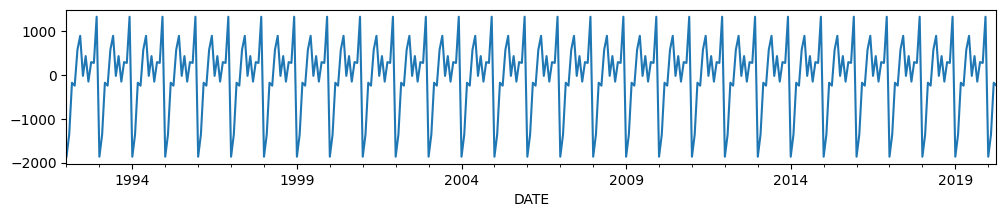

In [32]:
results.seasonal.plot(figsize=(12,2))

<Axes: xlabel='DATE'>

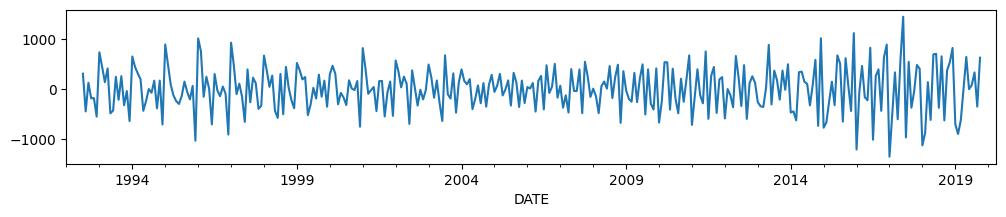

In [33]:
results.resid.plot(figsize=(12,2))

In [35]:
len(df)

340

In [36]:
train = df.iloc[:313]
test = df.iloc[313:]

In [37]:
len(test)

27

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [40]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
scaled_train

array([[0.03662502],
       [0.03653945],
       [0.08309088],
       [0.13118261],
       [0.10183125],
       [0.12818757],
       [0.12279651],
       [0.09464316],
       [0.09370187],
       [0.10508301],
       [0.10345713],
       [0.16301557],
       [0.        ],
       [0.01968167],
       [0.09661133],
       [0.11518056],
       [0.10919048],
       [0.14247818],
       [0.12211193],
       [0.12202636],
       [0.11406812],
       [0.10311484],
       [0.12570597],
       [0.16626733],
       [0.00376519],
       [0.02960808],
       [0.12082834],
       [0.10525415],
       [0.12228307],
       [0.16720863],
       [0.11064522],
       [0.14444635],
       [0.11492384],
       [0.10414171],
       [0.15000856],
       [0.16601061],
       [0.02900907],
       [0.03876433],
       [0.10593873],
       [0.0824063 ],
       [0.14410406],
       [0.16626733],
       [0.1020024 ],
       [0.16849221],
       [0.10302927],
       [0.13032689],
       [0.15574191],
       [0.153

In [41]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
len(scaled_train)
len(generator) # n_input = 2
scaled_train

array([[0.03662502],
       [0.03653945],
       [0.08309088],
       [0.13118261],
       [0.10183125],
       [0.12818757],
       [0.12279651],
       [0.09464316],
       [0.09370187],
       [0.10508301],
       [0.10345713],
       [0.16301557],
       [0.        ],
       [0.01968167],
       [0.09661133],
       [0.11518056],
       [0.10919048],
       [0.14247818],
       [0.12211193],
       [0.12202636],
       [0.11406812],
       [0.10311484],
       [0.12570597],
       [0.16626733],
       [0.00376519],
       [0.02960808],
       [0.12082834],
       [0.10525415],
       [0.12228307],
       [0.16720863],
       [0.11064522],
       [0.14444635],
       [0.11492384],
       [0.10414171],
       [0.15000856],
       [0.16601061],
       [0.02900907],
       [0.03876433],
       [0.10593873],
       [0.0824063 ],
       [0.14410406],
       [0.16626733],
       [0.1020024 ],
       [0.16849221],
       [0.10302927],
       [0.13032689],
       [0.15574191],
       [0.153

In [42]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03662502 0.03653945]
Predict this y: 
 [[0.08309088]]
Given the Array: 
[0.03662502 0.03653945 0.08309088 0.13118261 0.10183125 0.12818757
 0.12279651 0.09464316 0.09370187 0.10508301 0.10345713 0.16301557]
Predict this y: 
 [[0.]]


In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
%%time
# fit model
model.fit(generator,epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0575
Epoch 2/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0086
Epoch 3/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0100
Epoch 4/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0085
Epoch 5/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0070
Epoch 6/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0064
Epoch 7/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0052
Epoch 8/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0041
Epoch 9/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0033
Epoch 10/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0024
Epoch 11/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0024
Epoch 12/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0026
Epoch 13/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0024
Epoch 14/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0021
Epoch 15/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss:

In [48]:
model.history.history.keys()

dict_keys(['loss'])

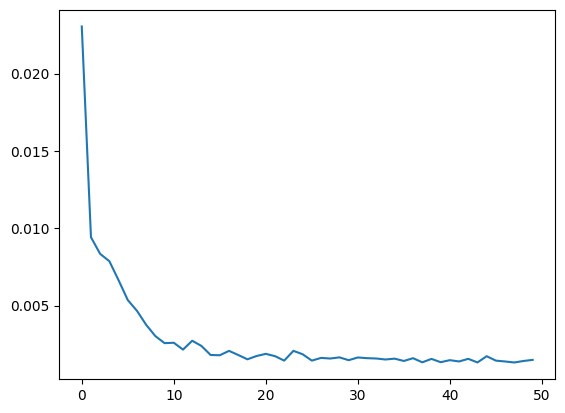

In [49]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [50]:
first_eval_batch = scaled_train[-12:]
first_eval_batch
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
model.predict(first_eval_batch)
scaled_test[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


array([0.62450796])

In [51]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
current_batch.shape
current_batch
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.80865993],
        [ 0.72377203],
        [ 0.89902447],
        [ 1.        ],
        [ 0.71572822],
        [ 0.88499059],
        [ 0.75646072],
        [ 0.82423413],
        [ 0.87035769],
        [ 0.95498888],
        [ 0.55296937],
        [99.        ]]])

In [52]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━

In [53]:
test_predictions

[array([0.6858131], dtype=float32),
 array([0.80219865], dtype=float32),
 array([0.7615662], dtype=float32),
 array([0.9332871], dtype=float32),
 array([0.9912778], dtype=float32),
 array([0.744605], dtype=float32),
 array([0.89303], dtype=float32),
 array([0.7637532], dtype=float32),
 array([0.84582585], dtype=float32),
 array([0.8881455], dtype=float32),
 array([0.9511368], dtype=float32),
 array([0.57543314], dtype=float32),
 array([0.72416115], dtype=float32),
 array([0.796818], dtype=float32),
 array([0.8019681], dtype=float32),
 array([0.9567641], dtype=float32),
 array([0.9827087], dtype=float32),
 array([0.7702516], dtype=float32),
 array([0.8994862], dtype=float32),
 array([0.77470076], dtype=float32),
 array([0.8677842], dtype=float32),
 array([0.901369], dtype=float32),
 array([0.94691455], dtype=float32),
 array([0.60117006], dtype=float32),
 array([0.75410974], dtype=float32),
 array([0.79849464], dtype=float32),
 array([0.84159696], dtype=float32)]

In [54]:
scaled_test

array([[0.62450796],
       [0.81619031],
       [0.75081294],
       [0.9396714 ],
       [0.97458497],
       [0.81182612],
       [0.94489132],
       [0.78726681],
       [0.91528324],
       [0.93428034],
       [1.05057334],
       [0.64906726],
       [0.67987335],
       [0.80788978],
       [0.86145816],
       [0.98767756],
       [0.96234811],
       [0.89448913],
       [0.95618689],
       [0.85238747],
       [0.97518398],
       [0.91921958],
       [1.12664727],
       [0.65274688],
       [0.71187746],
       [0.88815677],
       [0.79984597]])

Inverse Transformations and Compare

In [55]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[11045.41222489],
       [12405.49340582],
       [11930.66286695],
       [13937.39286482],
       [14615.07253337],
       [11732.45408595],
       [13466.94843757],
       [11956.21961164],
       [12915.32089436],
       [13409.86838758],
       [14145.9849658 ],
       [ 9755.51161599],
       [11493.54717636],
       [12342.61535788],
       [12402.79918957],
       [14211.74529576],
       [14514.93378115],
       [12032.15987194],
       [13542.39554763],
       [12084.15309119],
       [13171.92618573],
       [13564.39784932],
       [14096.64347386],
       [10056.27335644],
       [11843.52642465],
       [12362.20832813],
       [12865.9020865 ]])

In [56]:
test

,Sales
DATE,
2018-02-01,10329
2018-03-01,12569
2018-04-01,11805
2018-05-01,14012
2018-06-01,14420
2018-07-01,12518
2018-08-01,14073
2018-09-01,12231
2018-10-01,13727


In [58]:
test['Predictions'] = true_predictions

<ipython-input-58-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [59]:
test

,Sales,Predictions
DATE,,
2018-02-01,10329,11045.412225
2018-03-01,12569,12405.493406
2018-04-01,11805,11930.662867
2018-05-01,14012,13937.392865
2018-06-01,14420,14615.072533
2018-07-01,12518,11732.454086
2018-08-01,14073,13466.948438
2018-09-01,12231,11956.219612
2018-10-01,13727,12915.320894


<Axes: xlabel='DATE'>

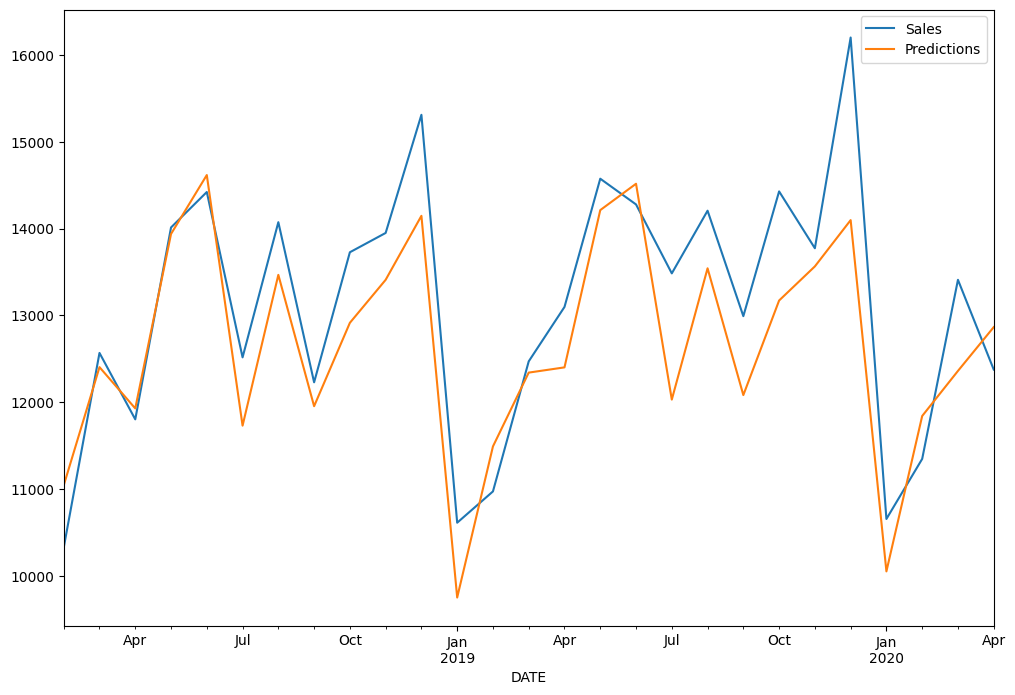

In [60]:
test.plot(figsize=(12,8))